In [1]:
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
import psutil

import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 

In [2]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

### Предобработка данных

In [3]:
data = pd.DataFrame(X)

In [46]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [47]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [5]:
na_index = X.loc[X.isna().any(axis=1)].index.tolist()

In [6]:
y_proc = y.drop(index=na_index)
X_proc = X.drop(index=na_index)

In [7]:
X_proc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [127]:
from sklearn.preprocessing import RobustScaler

In [142]:
X_scaled = RobustScaler().fit_transform(X_proc)

In [143]:
y_proc

,num
0,0
1,2
2,1
3,0
4,0
...,...
297,1
298,1
299,2
300,3


In [144]:
y_proc.value_counts()

num
0      160
1       54
2       35
3       35
4       13
Name: count, dtype: int64

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_proc, test_size=0.3, random_state=52, shuffle=True,stratify=y_proc)

In [146]:
y_test

,num
206,3
199,1
137,3
132,0
135,0
...,...
120,3
156,1
26,0
176,0


array([[<Axes: title={'center': 'num'}>]], dtype=object)

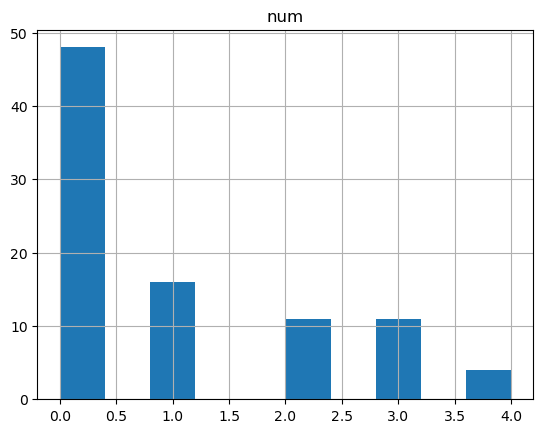

In [147]:
y_test.hist()

array([[<Axes: title={'center': 'num'}>]], dtype=object)

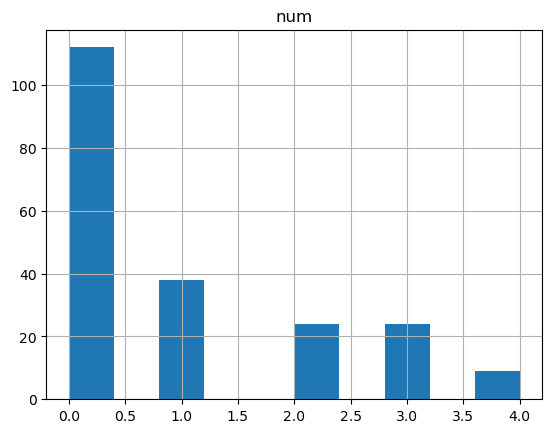

In [148]:
y_train.hist()

In [149]:
parameters = {'kernel':["linear", "poly", "rbf", "sigmoid"], 'C': list(range(1, 100)), "degree": list(range(1, 10))}

svc = SVC()
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train.values.ravel())

c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [150]:
print(clf.best_estimator_)
print(clf.best_params_)

SVC(C=2, degree=1, kernel='poly')
{'C': 2, 'degree': 1, 'kernel': 'poly'}


In [151]:
y_pred = clf.best_estimator_.predict(X_test)
y_pred

array([3, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 2, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 3, 0, 2, 0, 0, 2, 0, 3, 0, 2, 0, 2, 1, 0, 0,
       1, 0], dtype=int64)

In [152]:
print(f"Recall {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision {precision_score(y_test, y_pred, average='weighted')}")
print(f"F1 {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

Recall 0.5888888888888889
Precision 0.5012345679012346
F1 0.5378454106280194
Accuracy 0.5888888888888889


c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [153]:
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

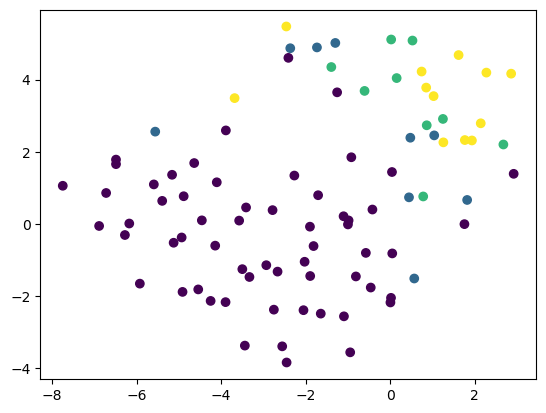

In [154]:
tsne = TSNE(n_components=2, random_state=52)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')

c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


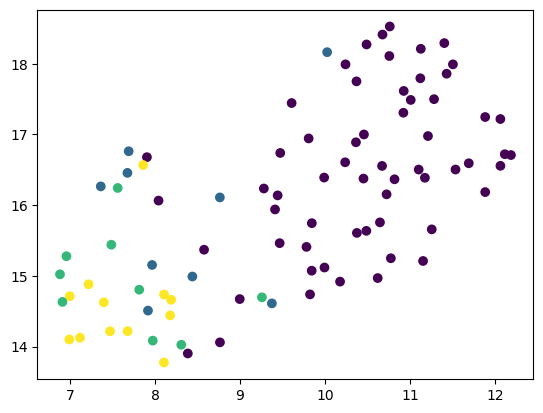

In [155]:
umap_model = umap.UMAP(n_components=2, random_state=52)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')

In [156]:
X_tsne[:,1]

array([ 3.54319668e+00, -3.03248227e-01,  2.55992031e+00, -3.36578631e+00,
        6.42134845e-01, -1.75796831e+00,  7.98997939e-01, -1.24869585e+00,
        2.39120579e+00,  3.48826838e+00, -2.38504934e+00, -1.80995822e+00,
       -2.12820601e+00, -6.09039724e-01,  3.64858079e+00, -1.88363274e-03,
       -3.83332539e+00,  2.45597625e+00,  8.61016154e-01,  4.34893370e+00,
       -9.88340471e-03, -1.87868381e+00,  1.06054723e+00, -1.31677413e+00,
        1.65942955e+00,  2.32670760e+00, -3.38614702e+00, -2.17095184e+00,
        2.26301169e+00, -7.23877102e-02, -1.43884087e+00,  2.79072285e+00,
        4.19483900e+00,  2.91167998e+00, -5.26839271e-02,  4.68043137e+00,
       -2.48054790e+00, -1.50755954e+00,  4.22420359e+00,  1.85011053e+00,
        2.16531679e-01,  1.00560002e-01,  2.59350061e+00,  1.39164793e+00,
        4.59935397e-01,  3.77953553e+00,  1.15716183e+00, -5.17335653e-01,
        7.40362763e-01,  1.09812260e+00,  1.78522134e+00, -3.55228019e+00,
        1.34366643e+00, -

In [157]:
### KNN

parameters = {'n_neighbors': list(range(3, 100)), "weights": ["uniform", "distance"], "algorithm":['ball_tree', 'kd_tree', 'brute']}
knn = KNeighborsClassifier()
knn_clf = GridSearchCV(knn, parameters, cv=4, n_jobs=psutil.cpu_count(logical=False))

knn_clf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']})

In [158]:
print(knn_clf.best_estimator_)
print(knn_clf.best_params_)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=21, weights='distance')
{'algorithm': 'ball_tree', 'n_neighbors': 21, 'weights': 'distance'}


In [159]:
y_pred = knn_clf.best_estimator_.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 0, 0, 2, 3, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 1, 0, 3, 1, 0, 1, 0, 0, 3, 0, 1, 0, 1, 0, 2, 1, 0, 0,
       1, 0], dtype=int64)

In [160]:
print(f"Recall {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision {precision_score(y_test, y_pred, average='weighted')}")
print(f"F1 {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

Recall 0.5777777777777777
Precision 0.5030799220272903
F1 0.5293974997406369
Accuracy 0.5777777777777777


c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


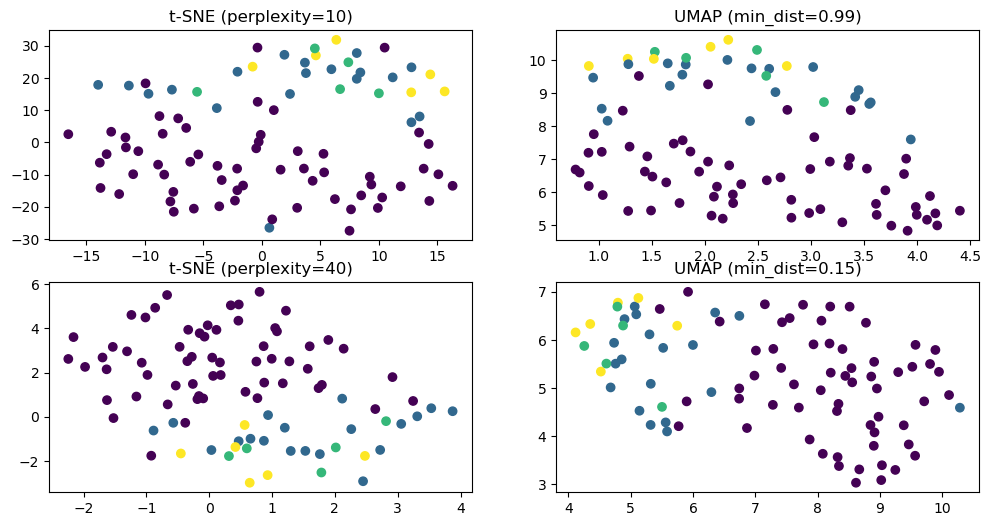

In [161]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.title('t-SNE (perplexity=10)')

plt.subplot(2, 2, 2)
umap_model = umap.UMAP(n_components=2, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')
plt.title('UMAP (min_dist=0.99)')

plt.subplot(2, 2, 3)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.title('t-SNE (perplexity=40)')

plt.subplot(2, 2, 4)
umap_model = umap.UMAP(n_components=2, min_dist=0.15, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')
plt.title('UMAP (min_dist=0.15)')

plt.show()

In [166]:
### RF

parameters = {"n_estimators": list(range(10, 100, 5)), "criterion": ["gini", "entropy", "log_loss"], "max_depth": list(range(2, 15)), "max_features": ["sqrt", "log2", None]}
rf = RandomForestClassifier()
rf_clf = GridSearchCV(rf, parameters, cv=4, n_jobs=psutil.cpu_count(logical=False))
rf_clf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95]})

In [167]:
print(rf_clf.best_estimator_)
print(rf_clf.best_params_)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=None,
                       n_estimators=10)
{'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'n_estimators': 10}


In [168]:
y_pred = rf_clf.best_estimator_.predict(X_test)
y_pred

array([3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 3, 2, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 1, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 3, 0, 1, 0, 3, 1, 1, 0,
       1, 0], dtype=int64)

In [169]:
print(f"Recall {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision {precision_score(y_test, y_pred, average='weighted')}")
print(f"F1 {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

Recall 0.5777777777777777
Precision 0.47122235788902456
F1 0.5122827827827827
Accuracy 0.5777777777777777


c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


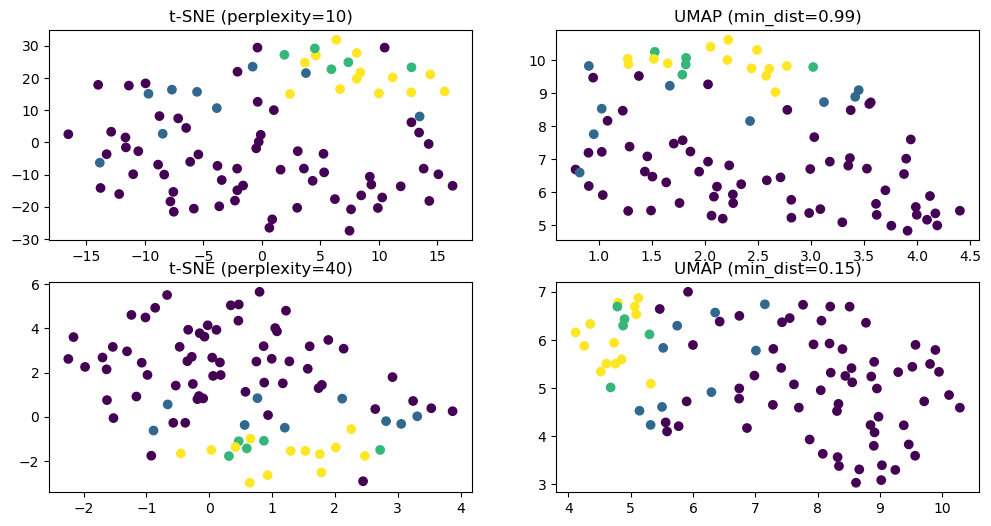

In [170]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.title('t-SNE (perplexity=10)')

plt.subplot(2, 2, 2)
umap_model = umap.UMAP(n_components=2, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')
plt.title('UMAP (min_dist=0.99)')

plt.subplot(2, 2, 3)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.title('t-SNE (perplexity=40)')

plt.subplot(2, 2, 4)
umap_model = umap.UMAP(n_components=2, min_dist=0.15, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')
plt.title('UMAP (min_dist=0.15)')

plt.show()

In [171]:
clf.best_estimator_.predict(X_test)
knn_clf.best_estimator_.predict(X_test)
rf_clf.best_estimator_.predict(X_test)

array([3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 3, 2, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 1, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 3, 0, 1, 0, 3, 1, 1, 0,
       1, 0], dtype=int64)

In [172]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

# Создаем объект SMOTE
smote = SMOTE(random_state=52)

# Ресемплируем тестовые данные
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Делаем предсказания без SMOTE
y_pred_clf = clf.best_estimator_.predict(X_test)
y_pred_knn_clf = knn_clf.best_estimator_.predict(X_test)
y_pred_rf_clf = rf_clf.best_estimator_.predict(X_test)

clf_smote = clf.best_estimator_.fit(X=X_train_smote, y=y_train_smote)
knn_clf_smote = knn_clf.best_estimator_.fit(X=X_train_smote, y=y_train_smote)
rf_clf_smote = rf_clf.best_estimator_.fit(X=X_train_smote, y=y_train_smote)

# Делаем предсказания с SMOTE
y_pred_clf_smote = clf_smote.predict(X_test)
y_pred_knn_clf_smote = knn_clf_smote.predict(X_test)
y_pred_rf_clf_smote = rf_clf_smote.predict(X_test)

# Выводим F1-меры для всех вариантов
print("F1-меры без SMOTE:")
print("clf:", f1_score(y_test, y_pred_clf, average='macro'))
print("knn_clf:", f1_score(y_test, y_pred_knn_clf, average='macro'))
print("rf_clf:", f1_score(y_test, y_pred_rf_clf, average='macro'))

print("\nF1-меры с SMOTE:")
print("clf:", f1_score(y_test, y_pred_clf_smote, average='macro'))
print("knn_clf:", f1_score(y_test, y_pred_knn_clf_smote, average='macro'))
print("rf_clf:", f1_score(y_test, y_pred_rf_clf_smote, average='macro'))

F1-меры без SMOTE:
clf: 0.31223188405797103
knn_clf: 0.29216464363523187
rf_clf: 0.2734324324324324

F1-меры с SMOTE:
clf: 0.29881977671451354
knn_clf: 0.3610233860986255
rf_clf: 0.2458959899749374


c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [173]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE


# Создаем объекты SMOTE
smote = SMOTE(random_state=52)
borderline_smote = BorderlineSMOTE(random_state=42)
borderline_smote2 = SVMSMOTE(random_state=42)

clf.best_estimator_.fit(X=X_train, y=y_train)
knn_clf.best_estimator_.fit(X=X_train, y=y_train)
rf_clf.best_estimator_.fit(X=X_train, y=y_train)

# Делаем предсказания без SMOTE
y_pred_clf = clf.best_estimator_.predict(X_test)
y_pred_knn_clf = knn_clf.best_estimator_.predict(X_test)
y_pred_rf_clf = rf_clf.best_estimator_.predict(X_test)
# Выводим F1-меры для всех вариантов
print("F1-меры без SMOTE:")
f1_clf = f1_score(y_test, y_pred_clf, average='macro')
print("clf:", f1_clf)
knn_clf_score = f1_score(y_test, y_pred_knn_clf, average='macro')
print("knn_clf:", knn_clf_score)
rf_clf_score = f1_score(y_test, y_pred_rf_clf, average='macro')
print("rf_clf:", rf_clf_score)


# Ресемплируем тестовые данные
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_borderline_smote, y_train_borderline_smote = borderline_smote.fit_resample(X_train, y_train)
X_train_borderline_smote2, y_train_borderline_smote2 = borderline_smote2.fit_resample(X_train, y_train)

clf_smote = clf.best_estimator_.fit(X=X_train_smote, y=y_train_smote)
knn_clf_smote = knn_clf.best_estimator_.fit(X=X_train_smote, y=y_train_smote)
rf_clf_smote = rf_clf.best_estimator_.fit(X=X_train_smote, y=y_train_smote)

# Делаем предсказания с SMOTE
y_pred_clf_smote = clf_smote.predict(X_test)
y_pred_knn_clf_smote = knn_clf_smote.predict(X_test)
y_pred_rf_clf_smote = rf_clf_smote.predict(X_test)

print("\nF1-меры с SMOTE:")
print("clf:", f1_score(y_test, y_pred_clf_smote, average='macro'))
print("knn_clf:", f1_score(y_test, y_pred_knn_clf_smote, average='macro'))
print("rf_clf:", f1_score(y_test, y_pred_rf_clf_smote, average='macro'))

clf_borderline_smote = clf.best_estimator_.fit(X=X_train_borderline_smote, y=y_train_borderline_smote)
knn_clf_borderline_smote = knn_clf.best_estimator_.fit(X=X_train_borderline_smote, y=y_train_borderline_smote)
rf_clf_borderline_smote = rf_clf.best_estimator_.fit(X=X_train_borderline_smote, y=y_train_borderline_smote)

# Делаем предсказания с Borderline-SMOTE
y_pred_clf_borderline_smote = clf_borderline_smote.predict(X_test)
y_pred_knn_clf_borderline_smote = knn_clf_borderline_smote.predict(X_test)
y_pred_rf_clf_borderline_smote = rf_clf_borderline_smote.predict(X_test)

print("\nF1-меры с Borderline-SMOTE:")
print("clf:", f1_score(y_test, y_pred_clf_borderline_smote, average='macro'))
print("knn_clf:", f1_score(y_test, y_pred_knn_clf_borderline_smote, average='macro'))
print("rf_clf:", f1_score(y_test, y_pred_rf_clf_borderline_smote, average='macro'))

clf_borderline_smote2 = clf.best_estimator_.fit(X=X_train_borderline_smote2, y=y_train_borderline_smote2)
knn_clf_borderline_smote2 = knn_clf.best_estimator_.fit(X=X_train_borderline_smote2, y=y_train_borderline_smote2)
rf_clf_borderline_smote2 = rf_clf.best_estimator_.fit(X=X_train_borderline_smote2, y=y_train_borderline_smote2)

# Делаем предсказания с Borderline-SMOTE2
y_pred_clf_borderline_smote2 = clf_borderline_smote2.predict(X_test)
y_pred_knn_clf_borderline_smote2 = knn_clf_borderline_smote2.predict(X_test)
y_pred_rf_clf_borderline_smote2 = rf_clf_borderline_smote2.predict(X_test)

print("\nF1-меры с Borderline-SMOTE2:")
print("clf:", f1_score(y_test, y_pred_clf_borderline_smote2, average='macro'))
print("knn_clf:", f1_score(y_test, y_pred_knn_clf_borderline_smote2, average='macro'))
print("rf_clf:", f1_score(y_test, y_pred_rf_clf_borderline_smote2, average='macro'))


F1-меры без SMOTE:
clf: 0.31223188405797103
knn_clf: 0.29216464363523187
rf_clf: 0.2544985250737463

F1-меры с SMOTE:
clf: 0.29881977671451354
knn_clf: 0.3610233860986255
rf_clf: 0.274951445108936

F1-меры с Borderline-SMOTE:
clf: 0.24442857142857138
knn_clf: 0.3494005994005994
rf_clf: 0.3040836401450212

F1-меры с Borderline-SMOTE2:
clf: 0.2620368634801625
knn_clf: 0.3716996820738567
rf_clf: 0.30939613526570053


c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A col

c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


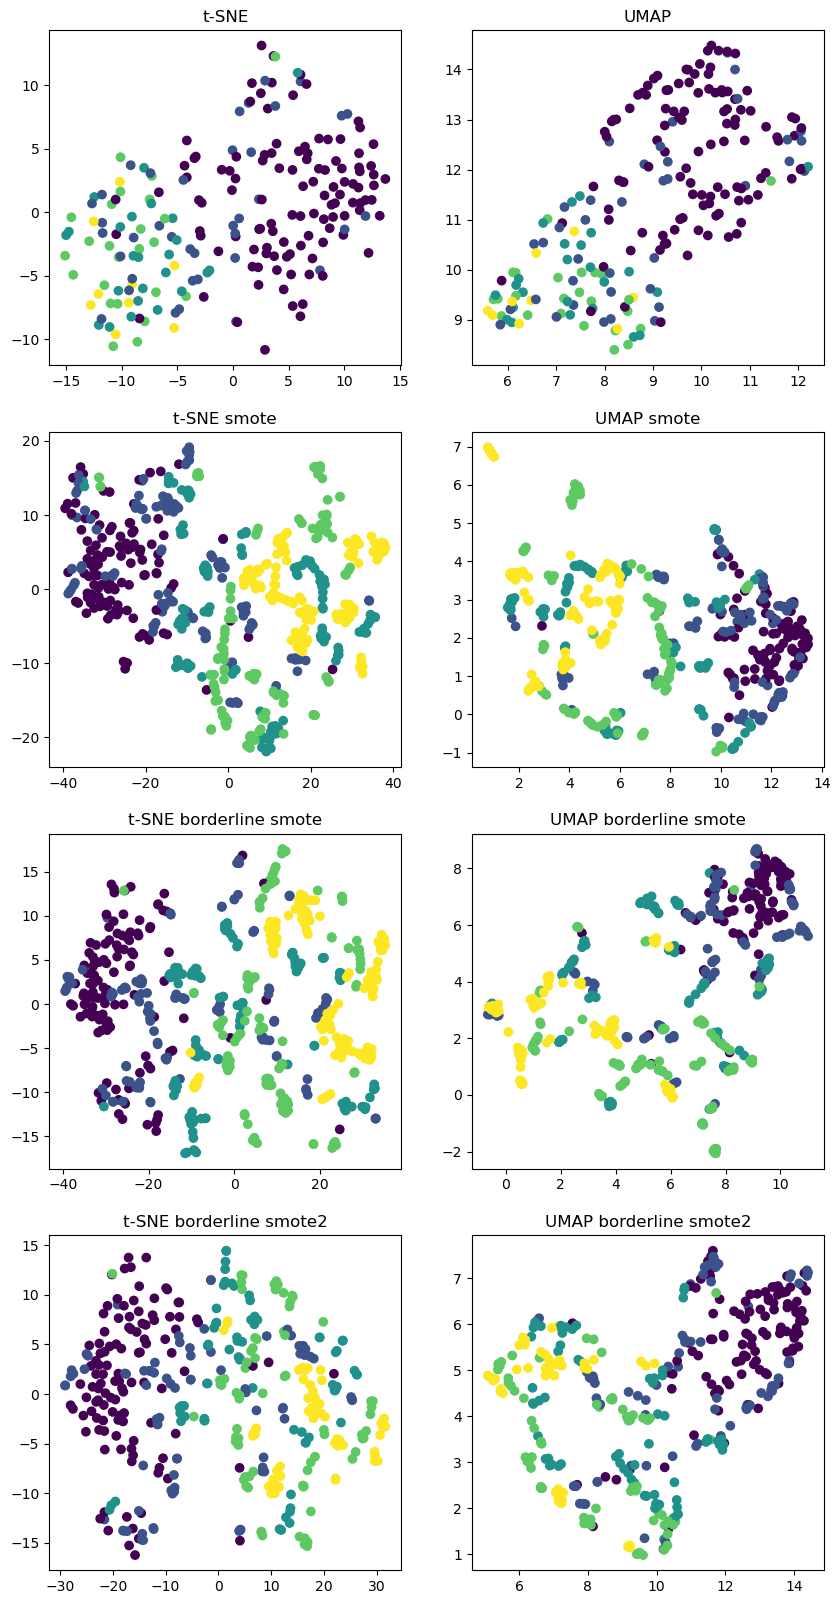

In [77]:
# Применяем t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_train)
X_test_smote_tsne = tsne.fit_transform(X_train_smote)
X_test_borderline_smote_tsne = tsne.fit_transform(X_train_borderline_smote)
X_test_borderline_smote2_tsne = tsne.fit_transform(X_train_borderline_smote2)

# Применяем UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_test_umap = umap_model.fit_transform(X_train)
X_test_smote_umap = umap_model.fit_transform(X_train_smote)
X_test_borderline_smote_umap = umap_model.fit_transform(X_train_borderline_smote)
X_test_borderline_smote2_umap = umap_model.fit_transform(X_train_borderline_smote2)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))

plt.subplot(4, 2, 1)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_train["num"], cmap='viridis')
plt.title("t-SNE")

plt.subplot(4, 2, 2)
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_train["num"], cmap='viridis')
plt.title("UMAP")

plt.subplot(4, 2, 3)
plt.scatter(X_test_smote_tsne[:, 0], X_test_smote_tsne[:, 1], c=y_train_smote["num"], cmap='viridis')
plt.title("t-SNE smote")

plt.subplot(4, 2, 4)
plt.scatter(X_test_smote_umap[:, 0], X_test_smote_umap[:, 1], c=y_train_smote["num"], cmap='viridis')
plt.title("UMAP smote")

plt.subplot(4, 2, 5)
plt.scatter(X_test_borderline_smote_tsne[:, 0], X_test_borderline_smote_tsne[:, 1], c=y_train_borderline_smote["num"], cmap='viridis')
plt.title("t-SNE borderline smote")

plt.subplot(4, 2, 6)
plt.scatter(X_test_borderline_smote_umap[:, 0], X_test_borderline_smote_umap[:, 1], c=y_train_borderline_smote["num"], cmap='viridis')
plt.title("UMAP borderline smote")

plt.subplot(4, 2, 7)
plt.scatter(X_test_borderline_smote2_tsne[:, 0], X_test_borderline_smote2_tsne[:, 1], c=y_train_borderline_smote2["num"], cmap='viridis')
plt.title("t-SNE borderline smote2")

plt.subplot(4, 2, 8)
plt.scatter(X_test_borderline_smote2_umap[:, 0], X_test_borderline_smote2_umap[:, 1], c=y_train_borderline_smote2["num"], cmap='viridis')
plt.title("UMAP borderline smote2")

plt.show()

In [174]:
X_train

array([[ 0.30769231,  0.        ,  1.        , ...,  0.        ,
         2.        ,  1.        ],
       [ 0.23076923, -1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.15384615,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.75      ],
       ...,
       [ 0.53846154, -1.        ,  1.        , ...,  0.        ,
         3.        ,  1.        ],
       [ 0.92307692,  0.        ,  1.        , ...,  0.        ,
         2.        ,  1.        ],
       [-1.07692308,  0.        , -2.        , ..., -1.        ,
         2.        ,  0.        ]])

In [175]:
X_train[:, :3]

array([[ 0.30769231,  0.        ,  1.        ],
       [ 0.23076923, -1.        ,  1.        ],
       [-1.15384615,  0.        , -1.        ],
       [ 0.84615385,  0.        ,  1.        ],
       [-0.92307692,  0.        ,  0.        ],
       [-1.69230769, -1.        , -1.        ],
       [ 0.07692308,  0.        ,  1.        ],
       [ 0.07692308, -1.        ,  1.        ],
       [-0.23076923,  0.        ,  1.        ],
       [ 1.53846154, -1.        ,  0.        ],
       [ 0.23076923,  0.        , -2.        ],
       [-0.07692308,  0.        ,  1.        ],
       [-0.76923077, -1.        ,  0.        ],
       [-0.84615385,  0.        ,  1.        ],
       [-0.23076923,  0.        ,  1.        ],
       [ 0.07692308,  0.        ,  0.        ],
       [ 0.23076923,  0.        ,  1.        ],
       [ 0.15384615,  0.        ,  0.        ],
       [ 0.84615385,  0.        ,  1.        ],
       [ 0.07692308,  0.        ,  1.        ],
       [ 0.15384615,  0.        ,  1.   

c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\pacmap\pacmap.py:822: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


Text(0.5, 1.0, 'trimap borderline-smote2')

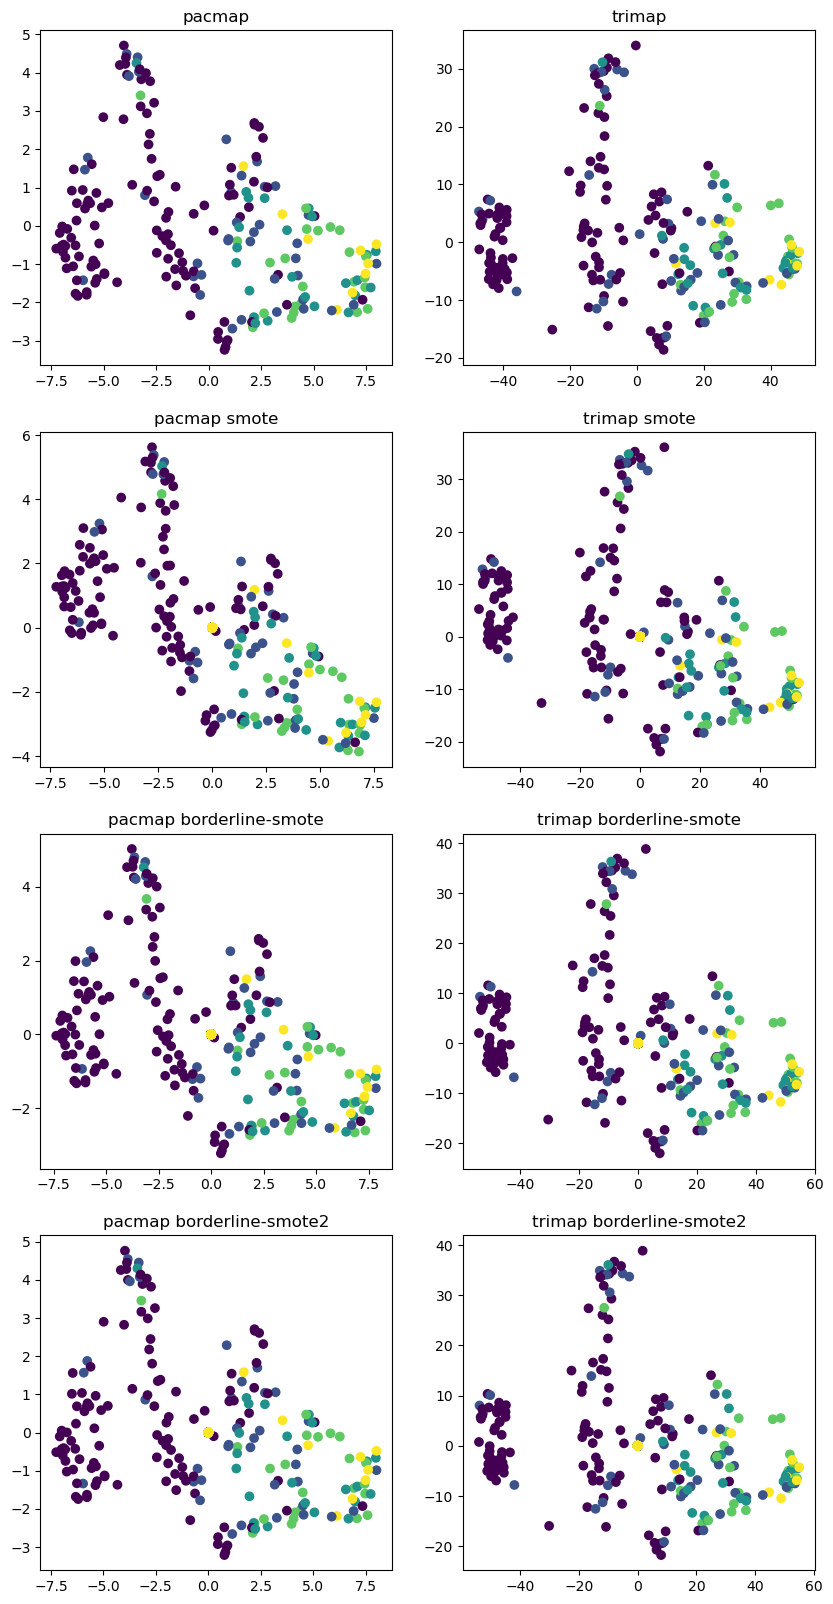

In [176]:
import pacmap
import trimap
plt.figure(figsize=(10, 20))

# Применяем pacmap
pacmap_model = pacmap.PaCMAP(n_components=2, random_state=42)
X_test_pacmap = pacmap_model.fit_transform(X_train)
X_test_smote_pacmap = pacmap_model.fit_transform(X_train_smote)
X_test_borderline_smote_pacmap = pacmap_model.fit_transform(X_train_borderline_smote)
X_test_borderline_smote2_pacmap = pacmap_model.fit_transform(X_train_borderline_smote2)

# Применяем trimap
trimap_model = trimap.TRIMAP()
X_test_trimap = trimap_model.fit_transform(X_train[:, :])
X_test_smote_trimap = trimap_model.fit_transform(X_train_smote)
X_test_borderline_smote_trimap = trimap_model.fit_transform(X_train_borderline_smote)
X_test_borderline_smote2_trimap = trimap_model.fit_transform(X_train_borderline_smote2)

plt.subplot(4, 2, 1)
plt.scatter(X_test_pacmap[:, 0], X_test_pacmap[:, 1], c=y_train["num"], cmap='viridis')
plt.title("pacmap")

plt.subplot(4, 2, 2)
plt.scatter(X_test_trimap[:, 0], X_test_trimap[:, 1], c=y_train["num"], cmap='viridis')
plt.title("trimap")

plt.subplot(4, 2, 3)
plt.scatter(X_test_smote_pacmap[:, 0], X_test_smote_pacmap[:, 1], c=y_train_smote["num"], cmap='viridis')
plt.title("pacmap smote")

plt.subplot(4, 2, 4)
plt.scatter(X_test_smote_trimap[:, 0], X_test_smote_trimap[:, 1], c=y_train_smote["num"], cmap='viridis')
plt.title("trimap smote")

plt.subplot(4, 2, 5)
plt.scatter(X_test_borderline_smote_pacmap[:, 0], X_test_borderline_smote_pacmap[:, 1], c=y_train_borderline_smote["num"], cmap='viridis')
plt.title("pacmap borderline-smote")

plt.subplot(4, 2, 6)
plt.scatter(X_test_borderline_smote_trimap[:, 0], X_test_borderline_smote_trimap[:, 1], c=y_train_borderline_smote["num"], cmap='viridis')
plt.title("trimap borderline-smote")

plt.subplot(4, 2, 7)
plt.scatter(X_test_borderline_smote2_pacmap[:, 0], X_test_borderline_smote2_pacmap[:, 1], c=y_train_borderline_smote2["num"], cmap='viridis')
plt.title("pacmap borderline-smote2")

plt.subplot(4, 2, 8)
plt.scatter(X_test_borderline_smote2_trimap[:, 0], X_test_borderline_smote2_trimap[:, 1], c=y_train_borderline_smote2["num"], cmap='viridis')
plt.title("trimap borderline-smote2")